In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import missingno as msno

<IPython.core.display.Javascript object>

In [3]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [4]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [5]:
def check_columns_match(df1, df2):
    """
    Check if two dataframes have the same columns in the same order.
    """

    df1_cols = set(df1.columns)
    df2_cols = set(df2.columns)

    same_cols = df1_cols == df2_cols

    print(f"Dataframes have the same columns: {same_cols}")

    same_order = all(df1.columns[i] == df2.columns[i] for i in range(len(df1.columns)))

    print(f"Dataframes have the same column order: {same_order}")

    return same_cols, same_order

<IPython.core.display.Javascript object>

In [6]:
innovandi = [
    "Alite total",
    "Belite total",
    "Belite alpha",
    "Belite beta",
    "Belite gamma",
    "Ferrite",
    "Aluminate",
    "Aluminate cubic",
    "Aluminate orto",
    "Free lime",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthalite",
    "Langbeinite",
    "Gypsum",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimite",
    "Quartz",
    "Muscovite",
]


embrapii_cics = [
    "C3S total",
    "C2S total",
    "C2S alpha",
    "C2S beta",
    "C2S gama",
    "C4AF",
    "C3A",
    "C3A cubic",
    "C3A orto",
    "CaO livre",
    "Portlandita",
    "Periclasio",
    "Arcanita",
    "Aphthalita",
    "Langbeinita",
    "Sulfato de cálcio",
    "Bassanita",
    "Anidrita",
    "Calcita",
    "Dolimita",
    "Quartzo",
    "Muscovita",
]
mineral_map = dict(zip(innovandi, embrapii_cics))

<IPython.core.display.Javascript object>

# partner_ii

In [7]:
df = pd.read_csv("../../../../data/raw/partner_ii/db3_cement.csv")

<IPython.core.display.Javascript object>

## Initial Preprocessing

### 1. Dropping columns where either there is no data nor it contributes to the analysis
### 2. Renaming columns to a short identifiable name

In [8]:
COLUMNS_TO_DROP = [
    "sample_id_plant",
    "raw_material_code",
    "water_demand",
]

COLUMNS_TO_RENAME = {
    "sample_date": "Date",
    "unified_material_name": "Cement_Type",
    "cao": "CaO",
    "sio2": "SiO2",
    "al2o3": "Al2O3",
    "fe2o3": "Fe2O3",
    "mgo": "MgO",
    "so3": "SO3",
    "k2o": "K2O",
    "na2o": "Na2O",
    # "cl": "Cl-",
    "cl": "Cl",
    "tio2": "TiO2",
    "alite": "Alite",
    "belite": "Belite",
    "aluminate": "Aluminate",
    "ferrite": "Ferrite",
    "free_lime": "Free CaO",
    "loi": "Loss on Ignition",
    "water_demand": "Water Demand",
    "setting_initial": "Initial setting time",
    "strength_1d": "CS1",
    "strength_3d": "CS3",
    "strength_7d": "CS7",
    "strength_28d": "CS28",
    "blaine": "Blaine",
    "sieve_32um": "#400",
    "sieve_45um": "#325",
}

<IPython.core.display.Javascript object>

In [9]:
COLUMNS_TO_RENAME_2 = {
    "Alite": "Total C3S",
    "Belite": "Total C2S",
    "Aluminate": "C3A",
    "Ferrite": "C4AF",
}

<IPython.core.display.Javascript object>

### Defining a single variable to identify Cement Type

### Dropping and rename the columns defined above

In [10]:
df = (
    df.drop(COLUMNS_TO_DROP, axis=1)
    .rename(COLUMNS_TO_RENAME, axis=1)
    .rename(COLUMNS_TO_RENAME_2, axis=1)
    .copy()
)
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

### Cleaning and converting numeric columns to float

In [11]:
NUMERIC_COLUMNS = [
    "CaO",
    "SiO2",
    "Al2O3",
    "Fe2O3",
    "MgO",
    "SO3",
    "K2O",
    "Na2O",
    # "Cl-",
    "Cl",
    "TiO2",
    # "Alite",
    # "Belite",
    # "Aluminate",
    # "Ferrite",
    "Total C3S",
    "Total C2S",
    "C3A",
    "C4AF",
    "Free CaO",
    "Loss on Ignition",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
    "Blaine",
    "#400",
    "#325",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = df.drop(["Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

## Dropping missing features

### Drop rows completely missing

In [12]:
index_to_keep = df.drop(["Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
df = df.iloc[index_to_keep].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [13]:
df.shape

(36818, 26)

<IPython.core.display.Javascript object>

### Dropping variable with Plant identification

In [14]:
df["Factory_Plant"] = "partner_ii"

<IPython.core.display.Javascript object>

#### Removing the timezone

In [15]:
df["Date"].dtype

datetime64[ns, UTC]

<IPython.core.display.Javascript object>

In [16]:
df["Date"] = df["Date"].dt.tz_localize(None)

<IPython.core.display.Javascript object>

In [17]:
df["Date"].dtype

dtype('<M8[ns]')

<IPython.core.display.Javascript object>

In [18]:
df_heildelberg = df.copy()

<IPython.core.display.Javascript object>

# partner_iv

In [19]:
import datetime as dt

<IPython.core.display.Javascript object>

In [20]:
xlsx = pd.ExcelFile(
    "../../../../data/raw/partner_iv/DB_Master_CP1_latest.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [21]:
df_cem_a = pd.read_excel(xlsx, sheet_name="Cem A exp control", skiprows=[1, 2])
df_cem_a = df_cem_a[
    [col for col in df_cem_a.columns.fillna("Unnamed") if "Unnamed" not in col]
]

df_cem_b = pd.read_excel(xlsx, sheet_name="Cem B exp control", skiprows=[1, 2])
df_cem_b = df_cem_b[
    [col for col in df_cem_b.columns.fillna("Unnamed") if "Unnamed" not in col]
]

df_cem_c = pd.read_excel(xlsx, sheet_name="Cem c exp control", skiprows=[1, 2])
df_cem_c = df_cem_c[
    [col for col in df_cem_c.columns.fillna("Unnamed") if "Unnamed" not in col]
]

df_cem_c["data"] = pd.TimedeltaIndex(df_cem_c["data"], unit="d") + dt.datetime(
    1900, 1, 1
)


df_cem_a["Cement_Type"] = "CEM A"
df_cem_b["Cement_Type"] = "CEM B"
df_cem_c["Cement_Type"] = "CEM C"

<IPython.core.display.Javascript object>

In [22]:
df = pd.concat([df_cem_a, df_cem_b, df_cem_c], ignore_index=True, axis=0)

<IPython.core.display.Javascript object>

In [23]:
df.columns

Index(['CEM A expedition control', 'sigla', 'data', 'LOI', 'SO3', 'Cl-',
       'Blaine', 'ph2oimm', 'Initial Setting Time', 'Soundness', 'flow',
       'rihcl', '2 days strenght', '7 days strenght', '28 days strenght',
       'residuo 24 micron', 'tratt. 32 µm', 'tratt. 40 µm', 'tratt. 63 µm',
       'SampleName', 'R_wp', 'Alite_M3 C3S M3', 'Alite_M1 C3S M1',
       'Alite_Sum C3S tot', 'Ratio_M1 (rapporto M1/M3)',
       'C3S_CS (taglia dei cristalliti C3S)', 'Belite_beta', 'C3A cub',
       'C3A_ortho', 'C3A tot', 'C4AF', 'CaO', 'Ca(OH)2', 'Calce libera',
       'Periclasio (MgO)', 'Quartz', 'K2SO4', 'Langbeinite – MgK2(SO4)2',
       'Aphthitalite – (K,Na)3(SO4)2', 'Gesso', 'Emiidrato', 'Anidrite',
       'Calcite – CaCO3', 'SO3_XRD', 'CO2_XRD', 'Cement_Type',
       'CEM B  expedition control', 'silo', 'CEM C  expedition control'],
      dtype='object')

<IPython.core.display.Javascript object>

In [24]:
df_partner_iv = (
    df.rename(
        {
            "LOI": "Loss on Ignition",
            "2 days strenght": "CS1",
            "7 days strenght": "CS3",
            "28 days strenght": "CS28",
            "Belite_beta": "Beta C2S",
            "C3A cub": "Cubic C3A",
            "C3A_ortho": "Orthorhombic C3A",
            "C3A tot": "C3A",
            "Calcite – CaCO3": "CaCO3",
            # "SO3_XRD": "SO3",
            "CO2_XRD": "CO2",
            "tratt. 32 µm": "#400",
            "tratt. 40 µm": "#325",
            # "tratt. 32 µm": "Sieve 32 um",
            # "tratt. 40 µm": "Sieve 40 um",
            "residuo 24 micron": "Sieve 24 um",
            "data": "Date",
            "Langbeinite – MgK2(SO4)2": "Langbeinite",
            "Aphthitalite – (K,Na)3(SO4)2": "Aphthitalite",
            "Gesso": "Gypsum",
            "tratt. 63 µm": "Sieve 63 µm",
            "Calce libera": "Free CaO",
            "Periclasio (MgO)": "Periclase",
            "Anidrite": "Anhydrite",
            "Belite_beta": "Belite Beta",
        },
        axis=1,
    )[
        [
            "Date",
            "Cl-",
            "Blaine",
            "C3A",
            "Loss on Ignition",
            "CS1",
            "CS3",
            "CS28",
            "Belite Beta",
            # "Beta C2S",
            "Cubic C3A",
            "CaCO3",
            "#400",
            "#325",
            # "Sieve 32 um",
            # "Sieve 40 um",
            # "Sieve 63 µm",
            "Sieve 24 um",
            "SO3",
            "C4AF",
            "CaO",
            "Langbeinite",
            "Aphthitalite",
            "Ca(OH)2",
            "CO2",
            "K2SO4",
            "Soundness",
            "Orthorhombic C3A",
            "Free CaO",
            "Quartz",
            "Gypsum",
            "Periclase",
            "Cement_Type",
        ]
    ]
    .reset_index(drop=True)
    .copy()
)

# df_partner_iv["Factory"] = "partner_iv"

<IPython.core.display.Javascript object>

In [25]:
NUMERIC_COLUMNS = [
    "Cl-",
    "Blaine",
    "C3A",
    "Loss on Ignition",
    "CS1",
    "CS3",
    "CS28",
    "Belite Beta",
    "Cubic C3A",
    "CaCO3",
    "#400",
    "#325",
    "Sieve 24 um",
    "SO3",
    "C4AF",
    "CaO",
    "Langbeinite",
    "Aphthitalite",
    "Ca(OH)2",
    "CO2",
    "K2SO4",
    "Soundness",
    "Orthorhombic C3A",
    "Free CaO",
    "Quartz",
    "Gypsum",
    "Periclase",
]

df_partner_iv = preprocess_numeric_cols(df_partner_iv, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df_partner_iv[NUMERIC_COLUMNS] = df_partner_iv[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df_partner_iv["Date"] = pd.to_datetime(df_partner_iv["Date"])

# Drop rows completely missing
index_to_keep = (
    df_partner_iv.drop(["Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df_partner_iv = df_partner_iv.iloc[index_to_keep].reset_index(drop=True)

df_partner_iv = df_partner_iv.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '.'


<IPython.core.display.Javascript object>

In [26]:
df_partner_iv["Factory_Plant"] = "partner_iv"

<IPython.core.display.Javascript object>

In [27]:
df_partner_iv.columns

Index(['Date', 'Cl-', 'Blaine', 'C3A', 'Loss on Ignition', 'CS1', 'CS3',
       'CS28', 'Belite Beta', 'Cubic C3A', 'CaCO3', '#400', '#325',
       'Sieve 24 um', 'SO3', 'C4AF', 'CaO', 'Langbeinite', 'Aphthitalite',
       'Ca(OH)2', 'CO2', 'K2SO4', 'Soundness', 'Orthorhombic C3A', 'Free CaO',
       'Quartz', 'Gypsum', 'Periclase', 'Cement_Type', 'Factory_Plant'],
      dtype='object')

<IPython.core.display.Javascript object>

# partner_i

In [28]:
xls = pd.ExcelFile(
    "../../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx",
    engine="openpyxl",
)
df = pd.read_excel(xls, "DB3 Cimento Shipping", header=[1, 2])

<IPython.core.display.Javascript object>

## Initial Preprocessing

In [29]:
df = pd.concat([df["Date"], df["Time"], df["Composition"], df["Properties"]], axis=1)
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)

df = pd.concat(
    [
        df["Production"].iloc[:, 0],
        df["Measurement"].iloc[:, 0],
        df["Production"].iloc[:, 1].rename("Production.1"),
        df["Measurement"].iloc[:, 1].rename("Measurement.1"),
        df.drop(["Production", "Measurement"], axis=1),
    ],
    axis=1,
)

df = df.infer_objects()

<IPython.core.display.Javascript object>

## Initial Preprocessing

### 1. Dropping columns where either there is no data nor it contributes to the analysis
### 2. Renaming columns to a short identifiable name

In [30]:
COLUMNS_TO_DROP = [
    "Measurement",
    "Production.1",
    "Measurement.1",
]

COLUMNS_TO_RENAME = {
    "Production": "Date",
    "Remarks": "Cement_Type",
    "LOI": "Loss on Ignition",
    "IR": "Insoluble Residue",
    "Total alkali as Na2O": "Total Alkali as Na2O",
    "Alite total": "Alite Total",
    "Belite total": "Total C2S",
    "Belite alpha": "Belite Alpha",
    "Belite beta": "Belite Beta",
    "Belite gamma": "Belite Gamma",
    "Ferrite": "C4AF",
    "Aluminate cubic": "Aluminate Cubic",
    "Aluminate orto": "Aluminate Orto",
    "Free lime": "Free CaO",
    "Dolimite": "Dolomite",
    "Aphthalite": "Aphthitalite",
    "1 day Compressive strength": "CS1",
    "3 day Compressive strength": "CS3",
    "7 day Compressive strength": "CS7",
    "28 day Compressive strength": "CS28",
}

<IPython.core.display.Javascript object>

In [31]:
COLUMNS_TO_RENAME_2 = {
    "Alite Total": "Total C3S",
    "Total C2S": "Total C2S",
    "Belite Alpha": "Alpha C2S",
    "Belite Beta": "Beta C2S",
    "Belite Gamma": "Gamma C2S",
    "C4AF": "C4AF",
    "Aluminate": "C3A",
    "Aluminate Cubic": "Cubic C3A",
    "Aluminate Orto": "Orthorhombic C3A",
    "Free lime": "Free CaO",
}

<IPython.core.display.Javascript object>

In [32]:
# COLUMNS_TO_RENAME_2 = {
#     "Alite total": "C3S total",
#     "Belite total": "C2S total",
#     "Belite alpha": "C2S alpha",
#     "Belite beta": "C2S beta",
#     "Belite gamma": "C2S gama",
#     "Ferrite": "C4AF",
#     "Aluminate": "C3A",
#     "Aluminate cubic": "C3A cubic",
#     "Aluminate orto": "C3A orto",
#     "Free lime": "CaO livre",
#     "Portlandite": "Portlandita",
#     "Periclase": "Periclasio",
#     "Arcanite": "Arcanita",
#     "Aphthalite": "Aphthalita",
#     "Langbeinite": "Langbeinita",
#     "Gypsum": "Sulfato de cálcio",
#     "Bassanite": "Bassanita",
#     "Anhydrite": "Anidrita",
#     "Calcite": "Calcita",
#     "Dolimite": "Dolimita",
#     "Quartz": "Quartzo",
#     "Muscovite": "Muscovita",
# }

<IPython.core.display.Javascript object>

### Defining a single variable to identify Cement Type

### Dropping and rename the columns defined above

In [33]:
df = (
    df.drop(COLUMNS_TO_DROP, axis=1)
    .rename(COLUMNS_TO_RENAME, axis=1)
    .rename(COLUMNS_TO_RENAME_2, axis=1)
    .copy()
)
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

### Cleaning and converting numeric columns to float

In [34]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Ca(OH)2",
    "CaCO3",
    "Total Alkali as Na2O",
    "Soundness",
    "Loss on Ignition",
    "Insoluble Residue",
    # "Alite Total",
    # "Total C2S",
    # "Belite Alpha",
    # "Belite Beta",
    # "Belite Gamma",
    # "C4AF",
    # "Aluminate",
    # "Aluminate Cubic",
    # "Aluminate Orto",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Gypsum",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolomite",
    "Quartz",
    "Muscovite",
    "%Gypsum",
    "%Limestone",
    "%Clinker",
    "Dehydration",
    "Blaine",
    "Initial setting time",
    "Final setting time",
    "Density",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
    "#200",
    "#325",
    "#400",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Drop rows completely missing
index_to_keep = df.drop(["Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

## Dropping missing features

### Drop rows completely missing

In [35]:
index_to_keep = df.drop(["Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
df = df.iloc[index_to_keep].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [36]:
df.shape

(1265, 54)

<IPython.core.display.Javascript object>

### Dropping variable with Plant identification

In [37]:
df["Factory_Plant"] = "partner_i"

<IPython.core.display.Javascript object>

In [38]:
df_partner_i = df.copy()

<IPython.core.display.Javascript object>

In [39]:
df_partner_i.columns

Index(['Date', 'CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3', 'K2O', 'TiO2',
       'Fe2O3', 'Ca(OH)2', 'CaCO3', 'Total Alkali as Na2O', 'Soundness',
       'Loss on Ignition', 'Insoluble Residue', 'Total C3S', 'Total C2S',
       'Alpha C2S', 'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A', 'Cubic C3A',
       'Orthorhombic C3A', 'Free CaO', 'Portlandite', 'Periclase', 'Arcanite',
       'Aphthitalite', 'Langbeinite', 'Gypsum', 'Bassanite', 'Anhydrite',
       'Calcite', 'Dolomite', 'Quartz', 'Muscovite', '%Gypsum', '%Limestone',
       '%Clinker', 'Dehydration', 'Cement_Type', 'Blaine',
       'Initial setting time', 'Final setting time', 'Density', 'CS1', 'CS3',
       'CS7', 'CS28', '#200', '#325', '#400', 'Factory_Plant'],
      dtype='object')

<IPython.core.display.Javascript object>

# Global Dataset

In [40]:
df = pd.concat([df_partner_iv, df_heildelberg, df_partner_i])

<IPython.core.display.Javascript object>

In [41]:
df.shape

(39060, 61)

<IPython.core.display.Javascript object>

In [42]:
df["Factory_Plant"].unique()

array(['partner_iv', 'partner_ii', 'partner_i'], dtype=object)

<IPython.core.display.Javascript object>

In [43]:
df = df.dropna(subset="CS28").reset_index(drop=True)

<IPython.core.display.Javascript object>

In [44]:
df.shape

(3248, 61)

<IPython.core.display.Javascript object>

## Preprocessing

### Missing Values (%)

In [45]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")


,Missing (%)
TiO2,99.969212
Cl,99.969212
Dehydration,75.554187
CO2,72.998768
K2SO4,72.967980
Belite Beta,72.967980
Ca(OH)2,72.967980
CaCO3,72.967980
Total Alkali as Na2O,72.752463
Sieve 24 um,70.597291


<IPython.core.display.Javascript object>

### Zeroed Values (%)

In [46]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%)")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%)")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%)
Soundness,45.043103
Muscovite,37.192118
Gamma C2S,21.951970
Anhydrite,14.347291
#200,13.392857
Langbeinite,5.172414
Arcanite,2.924877
CaO,0.708128
Alpha C2S,0.615764
Dolomite,0.554187


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [47]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

In [48]:
df.shape

(3248, 61)

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [49]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

In [50]:
df.shape

(3248, 61)

<IPython.core.display.Javascript object>

### Plant and cement type info

In [51]:
df["Factory_Plant"].unique()

array(['partner_iv', 'partner_ii', 'partner_i'], dtype=object)

<IPython.core.display.Javascript object>

In [52]:
df["Cement_Type"].unique()

array(['CEM A', 'CEM B', 'CEM C', 'Type III', 'Type I-II', 'Type IL',
       'CPVARI Expedido', 'CPIIF40 Expedido', 'CPIIF32 Expedido'],
      dtype=object)

<IPython.core.display.Javascript object>

In [53]:
df_partner_i["Cement_Type"]

0        CPVARI Expedido
1       CPIIF40 Expedido
2        CPVARI Expedido
3       CPIIF32 Expedido
4       CPIIF40 Expedido
              ...       
1260    CPIIF32 Expedido
1261    CPIIF40 Expedido
1262    CPIIF40 Expedido
1263    CPIIF32 Expedido
1264    CPIIF40 Expedido
Name: Cement_Type, Length: 1265, dtype: object

<IPython.core.display.Javascript object>

## Standardize Cement Type naming

In [54]:
# Preprocessing
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPV ARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CPV ARI RS", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CPIII 40 RS", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CPIV32RS", "CP IV-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CPIII40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II E 32", "CP II-E-32")
    .str.replace("CP II E 32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CPII F 32", "CP II-F-32")
    .str.replace("CPII F32", "CP II-F-32")
    .str.replace("CPIIF32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CPII F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CPIV 32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [55]:
for cement_type in df["Cement_Type"].sort_values().unique():
    print(cement_type)

CEM A
CEM B
CEM C
CP II-F-32
CP II-F-40
CP V-ARI
Type I-II
Type III
Type IL


<IPython.core.display.Javascript object>

In [56]:
df["Cement_Type"].nunique()

9

<IPython.core.display.Javascript object>

In [57]:
df["Cement_Type"].value_counts()

Cement_Type
Type I-II     735
CP II-F-40    593
CP II-F-32    410
CEM B         323
CEM C         320
CEM A         315
Type III      244
CP V-ARI      230
Type IL        78
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df.describe(percentiles=[0.99]).T

,count,mean,min,50%,99%,max,std
Date,3248,2021-01-31 05:08:53.682265856,2019-10-07 00:00:00,2020-12-30 05:30:00,2022-09-14 00:00:00,2022-10-21 00:00:00,NaN
Cl-,958.0,0.049674,0.011,0.054,0.089,0.099,0.023952
Blaine,3244.0,3254.15598,280.0,3554.5,5902.85,6491.0,2135.883008
C3A,3113.0,4.509892,1.34,4.57,6.59,32.889999,1.064667
Loss on Ignition,3038.0,5.142363,0.88,4.24,11.78,12.85,2.651158
CS1,2243.0,23.240691,12.1,23.9,35.4,37.3,6.556766
CS3,2309.0,283.793326,20.88,29.98,40.992,44802.0,3348.908527
CS28,3248.0,44.980074,32.400002,45.295,58.6,65.4,5.794638
Belite Beta,878.0,8.183468,1.43,8.11,14.0391,17.41,2.372578
Cubic C3A,2087.0,2.702415,0.73,2.61,4.6714,5.71,0.801093


<IPython.core.display.Javascript object>

## Removing Some Outliers

In [59]:
df["C3A"].idxmax()

3210

<IPython.core.display.Javascript object>

In [60]:
# This index has noise that makes the model do a bad prediction
df = df.reset_index(drop=True)
df = df.drop(df["C3A"].idxmax())
df = df.drop(df["Alpha C2S"].idxmax())

df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())
df = df.drop(df["CS3"].idxmax())

df = df.drop(df["#400"].idxmax())
df = df.drop(df["#400"].idxmax())

<IPython.core.display.Javascript object>

In [61]:
check = ["CS3", "C3A", "#400", "Alpha C2S"]

<IPython.core.display.Javascript object>

In [62]:
(df["CS3"] > 100).sum()

0

<IPython.core.display.Javascript object>

In [63]:
df[check].describe(percentiles=[0.99]).T

,count,mean,std,min,50%,99%,max
CS3,2292.0,31.851470,4.991803,20.88,29.88,39.799999,47.40
C3A,3097.0,4.507054,0.930531,1.34,4.57,6.590000,8.88
#400,1874.0,3.834408,2.658864,0.29,2.40,9.398100,13.33
Alpha C2S,1206.0,1.922852,0.861702,0.00,1.99,3.819500,4.33


<IPython.core.display.Javascript object>

In [64]:
df.shape

(3231, 61)

<IPython.core.display.Javascript object>

### Dropping duplicated rows

In [65]:
df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [66]:
df.shape

(3231, 61)

<IPython.core.display.Javascript object>

In [67]:
df.drop(["Date"], axis=1).groupby("Factory_Plant").apply(
    lambda x: x.duplicated().sum()
).sort_values(ascending=False)

Factory_Plant
partner_iv         0
partner_ii    0
partner_i    0
dtype: int64

<IPython.core.display.Javascript object>

In [68]:
df["Factory"] = df["Factory_Plant"].apply(lambda x: x.split("_")[0])

df.drop(["Date", "Cement_Type", "Factory_Plant"], axis=1).groupby("Factory").apply(
    lambda x: x.duplicated().sum()
).sort_values(ascending=False)

Factory
partner_iv         0
partner_ii    0
partner_i    0
dtype: int64

<IPython.core.display.Javascript object>

In [69]:
df = df.drop(["Factory"], axis=1)

<IPython.core.display.Javascript object>

In [70]:
df = df.loc[df.select_dtypes("number").drop_duplicates().index].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [71]:
df.shape

(3231, 61)

<IPython.core.display.Javascript object>

### Dropping rows with negative values

In [72]:
df[df.drop(["Date"], axis=1).duplicated()].drop("Date", axis=1).select_dtypes(
    include="number"
).apply(lambda x: x < 0).sum().sort_values(ascending=False)

Cl-                     0.0
Gamma C2S               0.0
K2O                     0.0
Na2O                    0.0
Cl                      0.0
TiO2                    0.0
Total C3S               0.0
Total C2S               0.0
Initial setting time    0.0
CS7                     0.0
Total Alkali as Na2O    0.0
Insoluble Residue       0.0
Alpha C2S               0.0
Beta C2S                0.0
Portlandite             0.0
Blaine                  0.0
Arcanite                0.0
Bassanite               0.0
Anhydrite               0.0
Calcite                 0.0
Dolomite                0.0
Muscovite               0.0
%Gypsum                 0.0
%Limestone              0.0
%Clinker                0.0
Dehydration             0.0
Final setting time      0.0
Density                 0.0
MgO                     0.0
Fe2O3                   0.0
Al2O3                   0.0
SiO2                    0.0
C3A                     0.0
Loss on Ignition        0.0
CS1                     0.0
CS3                 

<IPython.core.display.Javascript object>

In [73]:
df.shape

(3231, 61)

<IPython.core.display.Javascript object>

In [74]:
df.drop("Date", axis=1).select_dtypes(include="number").apply(
    lambda x: x < 0
).sum().sort_values(ascending=False)

Cl-                     0
Gamma C2S               0
K2O                     0
Na2O                    0
Cl                      0
TiO2                    0
Total C3S               0
Total C2S               0
Initial setting time    0
CS7                     0
Total Alkali as Na2O    0
Insoluble Residue       0
Alpha C2S               0
Beta C2S                0
Portlandite             0
Blaine                  0
Arcanite                0
Bassanite               0
Anhydrite               0
Calcite                 0
Dolomite                0
Muscovite               0
%Gypsum                 0
%Limestone              0
%Clinker                0
Dehydration             0
Final setting time      0
Density                 0
MgO                     0
Fe2O3                   0
Al2O3                   0
SiO2                    0
C3A                     0
Loss on Ignition        0
CS1                     0
CS3                     0
CS28                    0
Belite Beta             0
Cubic C3A   

<IPython.core.display.Javascript object>

In [75]:
df[
    df.drop("Date", axis=1)
    .select_dtypes(include="number")
    .apply(lambda x: x < 0)
    .any(axis=1)
]["Factory_Plant"].value_counts()

Series([], Name: count, dtype: int64)

<IPython.core.display.Javascript object>

In [76]:
index = df[
    df.drop("Date", axis=1)
    .select_dtypes(include="number")
    .apply(lambda x: x < 0)
    .any(axis=1)
].index

df = df.drop(index).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3231 non-null   datetime64[ns]
 1   Cl-                   945 non-null    float64       
 2   Blaine                3227 non-null   float64       
 3   C3A                   3097 non-null   float64       
 4   Loss on Ignition      3021 non-null   float64       
 5   CS1                   2228 non-null   float64       
 6   CS3                   2292 non-null   float64       
 7   CS28                  3231 non-null   float64       
 8   Belite Beta           866 non-null    float64       
 9   Cubic C3A             2072 non-null   float64       
 10  CaCO3                 866 non-null    float64       
 11  #400                  1874 non-null   float64       
 12  #325                  2286 non-null   float64       
 13  Sieve 24 um       

<IPython.core.display.Javascript object>

### Reseting the index

In [78]:
df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

### Sort the dataset by date

In [79]:
# We first make sure Date column was infered correctly
df["Date"].dtype

dtype('<M8[ns]')

<IPython.core.display.Javascript object>

In [80]:
df["Date"] = df["Date"].dt.date

<IPython.core.display.Javascript object>

df = df.sort_values(by="Date")

In [81]:
df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [82]:
# df = df.iloc[1:].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [83]:
df["Final setting time"].isna().sum()

2001

<IPython.core.display.Javascript object>

# Extra preprocessing

## Dropping missing variables with 35% or more of missing values

In [84]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")


,Missing (%)
TiO2,99.969050
Cl,99.969050
Dehydration,75.518415
CO2,73.228103
K2SO4,73.197153
Belite Beta,73.197153
Ca(OH)2,73.197153
CaCO3,73.197153
Total Alkali as Na2O,72.640050
Sieve 24 um,70.844940


<IPython.core.display.Javascript object>

<Axes: >

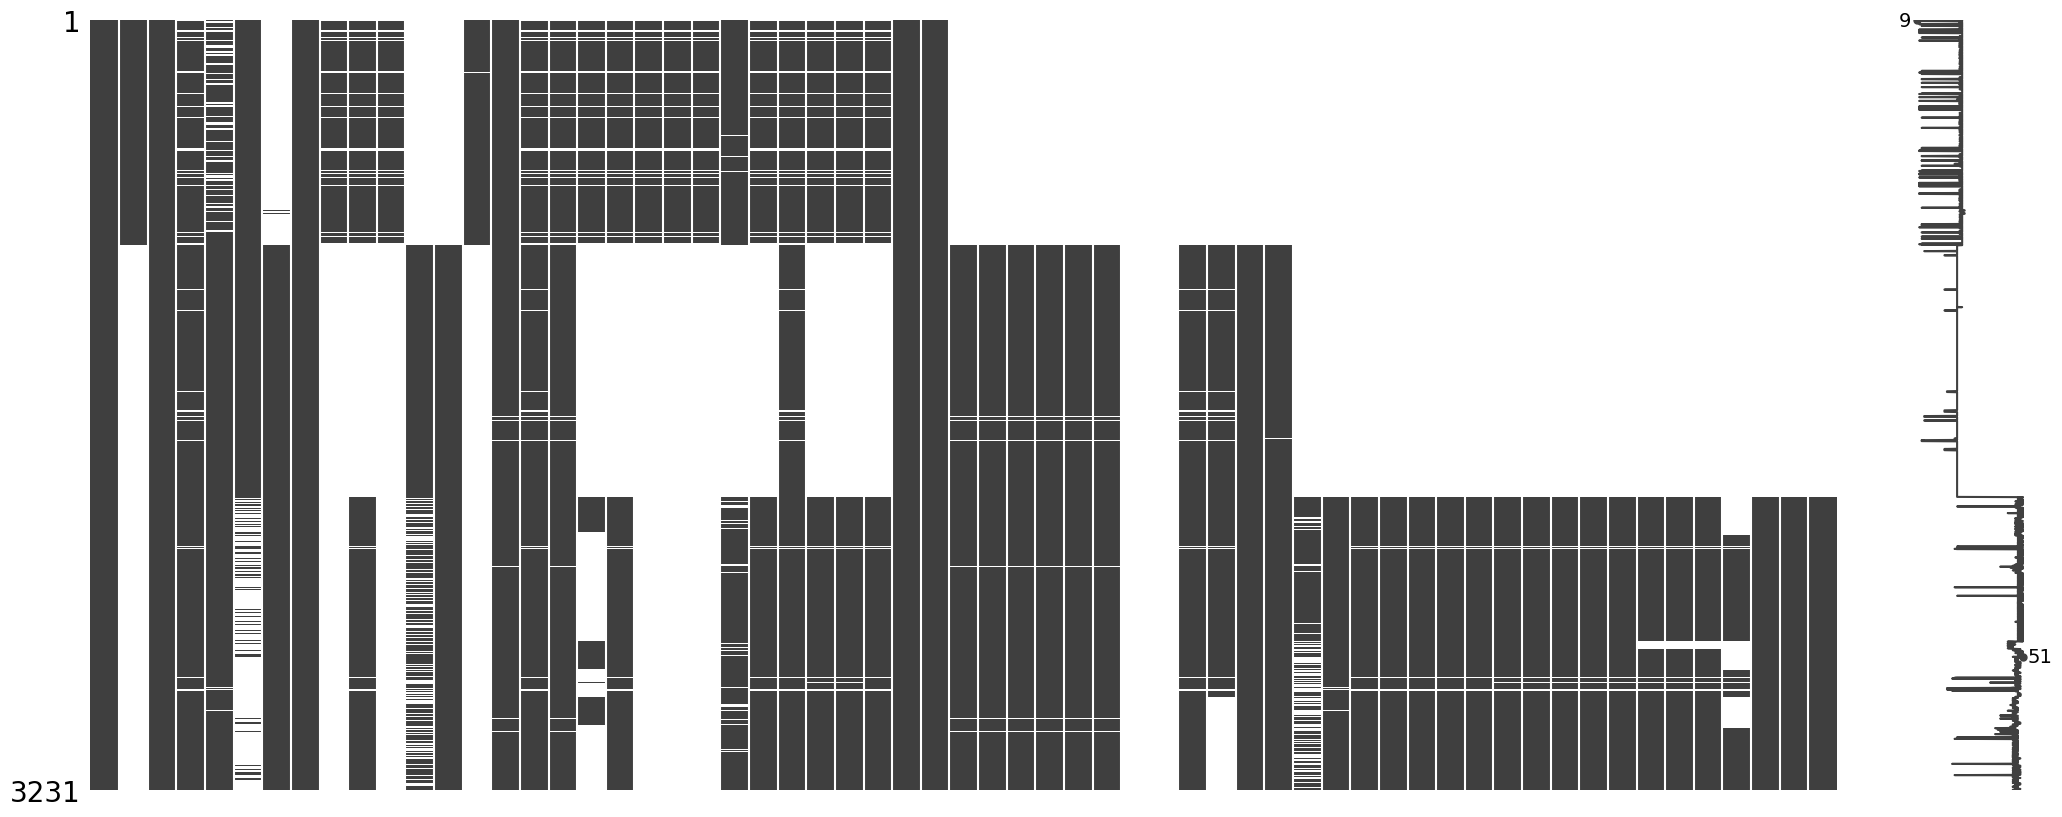

<IPython.core.display.Javascript object>

In [85]:
msno.matrix(df)

In [86]:
threshold = 0.35
missing_ratio = df.isnull().mean(axis=0)
# Filter columns to drop based on the threshold
columns_to_drop = missing_ratio[missing_ratio >= threshold].index
df = df.drop(columns_to_drop, axis=1)

<IPython.core.display.Javascript object>

In [87]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CS1,31.043021
Total C3S,30.950170
Al2O3,29.835964
Na2O,29.835964
K2O,29.835964
MgO,29.835964
Fe2O3,29.835964
SiO2,29.835964
CS7,29.309811
Initial setting time,29.247911


<IPython.core.display.Javascript object>

## Removng duplicated Values

In [88]:
df.shape

(3231, 23)

<IPython.core.display.Javascript object>

In [89]:
all_cols = [
    "Blaine",
    "C3A",
    "Loss on Ignition",
    "CS1",
    "CS3",
    "CS28",
    "#325",
    "SO3",
    "C4AF",
    "CaO",
    "Free CaO",
    "Cement_Type",
    "Factory_Plant",
    "SiO2",
    "Al2O3",
    "Fe2O3",
    "MgO",
    "K2O",
    "Na2O",
    "Total C3S",
    "Initial setting time",
    "CS7",
]

chemical_mineralogical_cols = [
    "Loss on Ignition",
    "SO3",
    "C4AF",
    "CaO",
    "Free CaO",
    "SiO2",
    "Al2O3",
    "Fe2O3",
    "MgO",
    "K2O",
    "Na2O",
    "Total C3S",
]

df = df.drop_duplicates(subset=all_cols)
df = df.drop_duplicates(subset=chemical_mineralogical_cols)

<IPython.core.display.Javascript object>

In [90]:
df.shape

(3213, 23)

<IPython.core.display.Javascript object>

## Dropping negative values

In [91]:
df.select_dtypes(include="number").apply(lambda x: x < 0).any(axis=1).any()

False

<IPython.core.display.Javascript object>

In [92]:
numeric_cols = df.select_dtypes(include="number")
has_negative = numeric_cols.lt(0).any(axis=1)
has_negative.sum()

0

<IPython.core.display.Javascript object>

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Blaine,3209.0,3251.426301,2144.102810,280.000000,470.000000,3554.000000,5430.000000,6491.000000
C3A,3094.0,4.507125,0.930392,1.340000,3.740000,4.570000,5.250000,8.880000
Loss on Ignition,3016.0,5.111999,2.622743,0.880000,3.160000,4.210000,5.890000,12.850000
CS1,2211.0,23.233437,6.581507,12.100000,16.240000,23.940000,28.799999,37.300000
CS3,2291.0,31.852571,4.992614,20.880000,27.300000,29.900000,36.900002,47.400000
CS28,3213.0,44.999751,5.795633,32.400002,40.590000,45.299999,48.400002,65.400000
#325,2284.0,46.262999,47.389115,0.060000,1.000000,6.800000,97.100000,100.000000
SO3,3195.0,3.277925,0.503438,1.770000,2.900000,3.140000,3.620000,5.574080
C4AF,3094.0,9.667673,1.693385,4.750000,8.400000,10.060000,11.040000,16.150000
CaO,3130.0,44.279193,26.883704,0.000000,1.700000,60.008390,61.900000,64.750000


<IPython.core.display.Javascript object>

## Dropping rows with zero values

In [94]:
numeric_cols = df.select_dtypes(include="number")
has_zero = numeric_cols.eq(0).any(axis=1)
has_zero.sum()

33

<IPython.core.display.Javascript object>

In [95]:
pd.options.display.max_columns = None
df = df[~has_zero].reset_index(drop=True)

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [96]:
df.to_csv("../../../../data/interim/Global-Dataset/global_dataset_inn.csv", index=False)

<IPython.core.display.Javascript object>

In [97]:
df.shape

(3180, 23)

<IPython.core.display.Javascript object>

<Axes: >

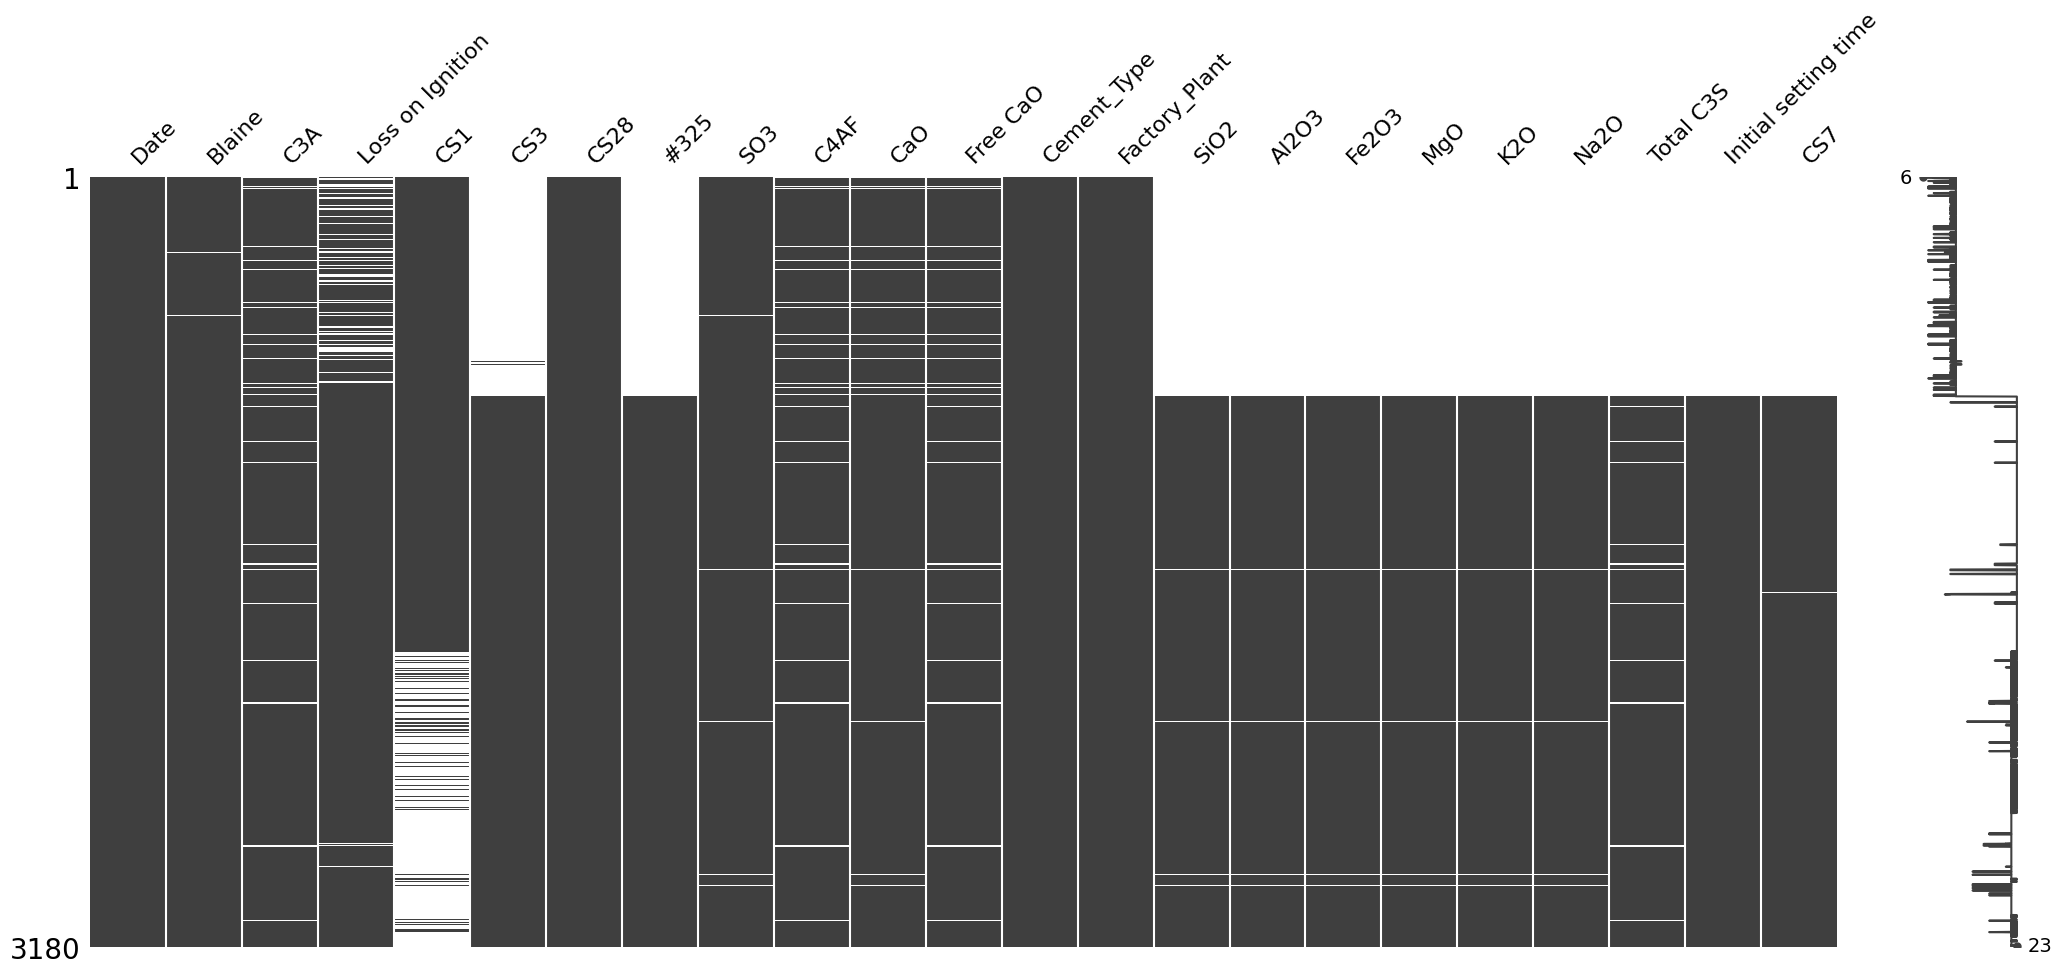

<IPython.core.display.Javascript object>

In [98]:
msno.matrix(df)

In [99]:
df["Factory_Plant"].value_counts()

Factory_Plant
partner_i    1223
partner_ii    1051
partner_iv          906
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [100]:
df["Factory_Plant"].value_counts(normalize=True) * 100

Factory_Plant
partner_i    38.459119
partner_ii    33.050314
partner_iv         28.490566
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

# Extra preprocessing for additional experiment

In [101]:
df_partner_iv = (
    df[df["Factory_Plant"].eq("partner_iv")].reset_index(drop=True).sort_values(by="Date")
)
df_partner_i = (
    df[df["Factory_Plant"].eq("partner_i")]
    .reset_index(drop=True)
    .sort_values(by="Date")
)
df_partner_ii = (
    df[df["Factory_Plant"].eq("partner_ii")]
    .reset_index(drop=True)
    .sort_values(by="Date")
)

<IPython.core.display.Javascript object>

In [104]:
size = 0.7

pre_train_partner_iv = (
    df_partner_iv.iloc[0 : round(df_partner_iv.shape[0] * size)]
    .reset_index(drop=True)
    .sort_values(by="Date")
)
fine_tuning_partner_iv = (
    df_partner_iv.iloc[round(df_partner_iv.shape[0] * size) :]
    .reset_index(drop=True)
    .sort_values(by="Date")
)

pre_train_partner_i = (
    df_partner_i.iloc[0 : round(df_partner_i.shape[0] * size)]
    .reset_index(drop=True)
    .sort_values(by="Date")
)
fine_tuning_partner_i = (
    df_partner_i.iloc[round(df_partner_i.shape[0] * size) :]
    .reset_index(drop=True)
    .sort_values(by="Date")
)

pre_train_partner_ii = (
    df_partner_ii.iloc[0 : round(df_partner_ii.shape[0] * size)]
    .reset_index(drop=True)
    .sort_values(by="Date")
)
fine_tuning_partner_ii = (
    df_partner_ii.iloc[round(df_partner_ii.shape[0] * size) :]
    .reset_index(drop=True)
    .sort_values(by="Date")
)

<IPython.core.display.Javascript object>

In [105]:
df_pre_train = pd.concat([pre_train_partner_ii, pre_train_partner_iv, pre_train_partner_i])

<IPython.core.display.Javascript object>

In [106]:
df_pre_train = df_pre_train.sort_values(by="Date").reset_index(drop=True)

<IPython.core.display.Javascript object>

In [107]:
(df_pre_train.isna().sum() / df_pre_train.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
CS1,31.895777
Total C3S,30.188679
Al2O3,29.110512
Na2O,29.110512
K2O,29.110512
MgO,29.110512
Fe2O3,29.110512
SiO2,29.110512
CS7,28.481581
Initial setting time,28.481581


<IPython.core.display.Javascript object>

In [108]:
df_pre_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Blaine,2223.0,3240.349978,2145.455497,280.000000,551.500000,3561.000000,5415.000000,6491.000000
C3A,2156.0,4.626162,0.888971,1.340000,3.950000,4.730000,5.300000,7.350000
Loss on Ignition,2065.0,4.963453,2.639076,0.880000,3.110000,3.830000,5.830000,12.500000
CS1,1516.0,23.395033,6.522243,12.690000,16.450000,24.285000,28.525000,37.300000
CS3,1599.0,31.979081,4.848015,22.870000,27.510000,30.170000,36.799999,47.400000
CS28,2226.0,45.244331,5.766462,32.400002,41.260000,45.400002,48.400002,65.400000
#325,1592.0,46.209052,47.331112,0.060000,1.000000,6.800000,96.882500,99.960000
SO3,2212.0,3.264142,0.512941,1.770000,2.900000,3.120000,3.592647,5.574080
C4AF,2156.0,9.563581,1.787079,4.750000,8.107500,10.040000,11.050000,16.150000
CaO,2180.0,44.231184,26.854155,0.010000,1.700000,59.971310,61.900000,64.750000


<IPython.core.display.Javascript object>

In [109]:
(fine_tuning_partner_iv.isna().sum() / fine_tuning_partner_iv.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
CS7,100.000000
SiO2,100.000000
Initial setting time,100.000000
Total C3S,100.000000
Na2O,100.000000
CS3,100.000000
K2O,100.000000
#325,100.000000
MgO,100.000000
Fe2O3,100.000000


<IPython.core.display.Javascript object>

In [110]:
(fine_tuning_partner_ii.isna().sum() / fine_tuning_partner_ii.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
Free CaO,1.904762
C3A,1.904762
Total C3S,1.904762
C4AF,1.904762
SiO2,0.952381
Na2O,0.952381
K2O,0.952381
MgO,0.952381
Fe2O3,0.952381
SO3,0.952381


<IPython.core.display.Javascript object>

In [111]:
(fine_tuning_partner_i.isna().sum() / fine_tuning_partner_i.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

,Missing (%)
CS1,77.929155
Free CaO,2.452316
C3A,2.452316
Total C3S,2.452316
C4AF,2.452316
Loss on Ignition,1.362398
SiO2,0.000000
Initial setting time,0.000000
Na2O,0.000000
K2O,0.000000


<IPython.core.display.Javascript object>

In [112]:
df_pre_train.to_csv(
    "../../../../data/interim/Global-Dataset/global_dataset_inn_v2.csv", index=False
)

<IPython.core.display.Javascript object>

In [113]:
fine_tuning_partner_iv.to_csv(
    "../../../../data/interim/partner_iv/cement-shipping_fine_tuning.csv", index=False
)
fine_tuning_partner_ii.to_csv(
    "../../../../data/interim/partner_ii/cement-shipping_fine_tuning.csv", index=False
)
fine_tuning_partner_i.to_csv(
    "../../../../data/interim/partner_i-Oficial/cement-shipping_fine_tuning.csv",
    index=False,
)

<IPython.core.display.Javascript object>